<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/03_Distribuciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Distribuciones

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Variables Categóricas


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


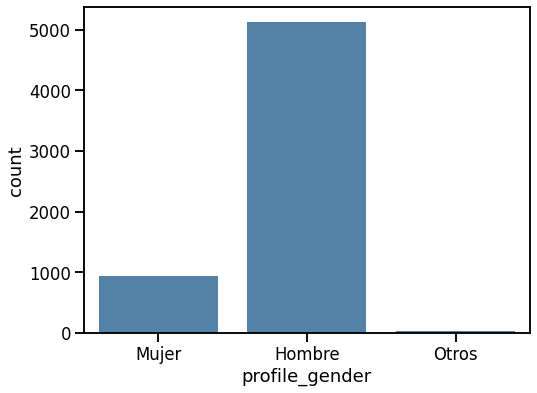

In [ ]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df.profile_gender, color='steelblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


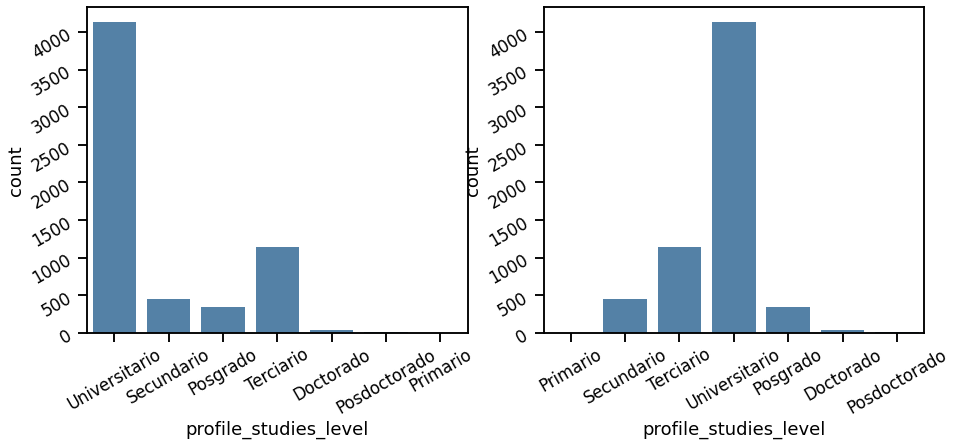

In [ ]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[0])
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30)

# Variables Numéricas


In [ ]:
salary_col='salary_monthly_BRUTO'
#salary_col='salary_monthly_NETO'

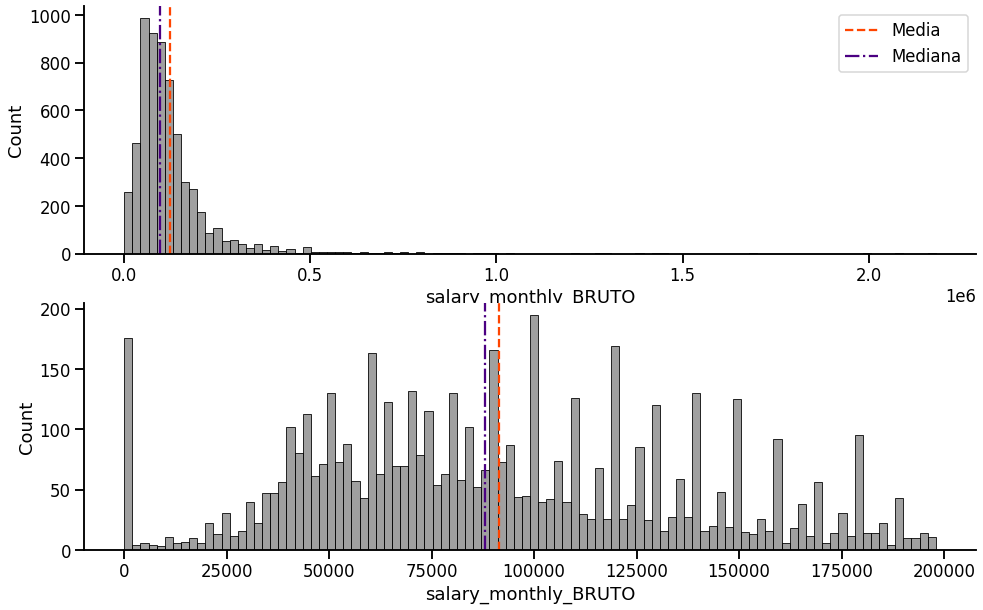

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000]
seaborn.histplot(filtered_df[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

#Varias Variables



## Varias Categóricas

In [ ]:
## Tabla de contingencia
pd.crosstab(df.profile_gender, df.profile_studies_level)#, normalize=True)

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,19,4,256,2,424,970,3447
Mujer,8,0,85,0,24,158,667
Otros,3,0,1,0,1,7,19


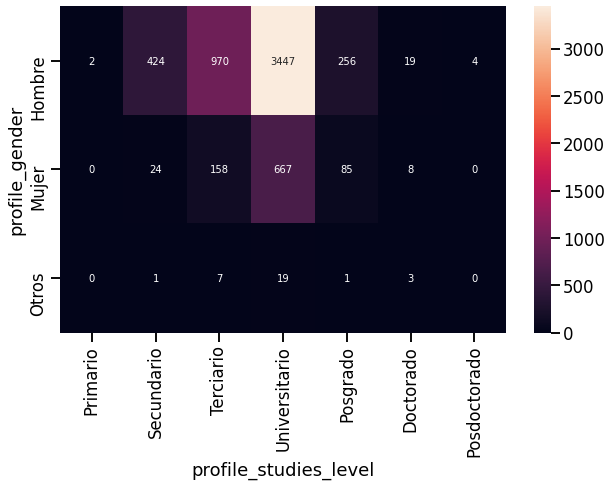

In [ ]:
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df.profile_gender,
                  df.profile_studies_level)[sorted_studies_levels]
seaborn.heatmap(exp, annot=True, fmt='g')

In [ ]:
## Tabla de contingencia normalizada
pd.crosstab(df.profile_gender, df.profile_studies_level, normalize=True)

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,0.003117,0.000656,0.042002,0.000328,0.069565,0.159147,0.565546
Mujer,0.001313,0.000000,0.013946,0.000000,0.003938,0.025923,0.109434
Otros,0.000492,0.000000,0.000164,0.000000,0.000164,0.001148,0.003117


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

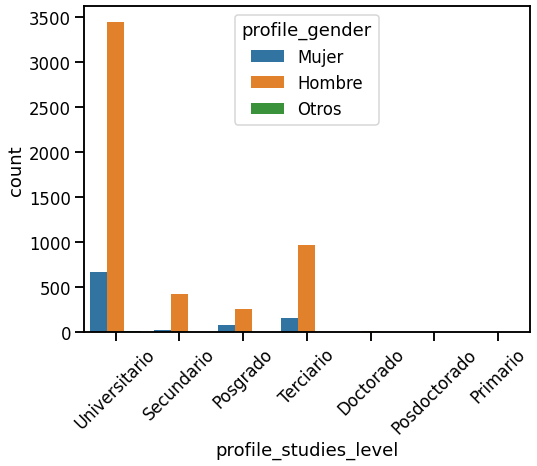

In [ ]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df.profile_studies_level,  hue=df.profile_gender )
plt.xticks(rotation=45)

## Varias numéricas

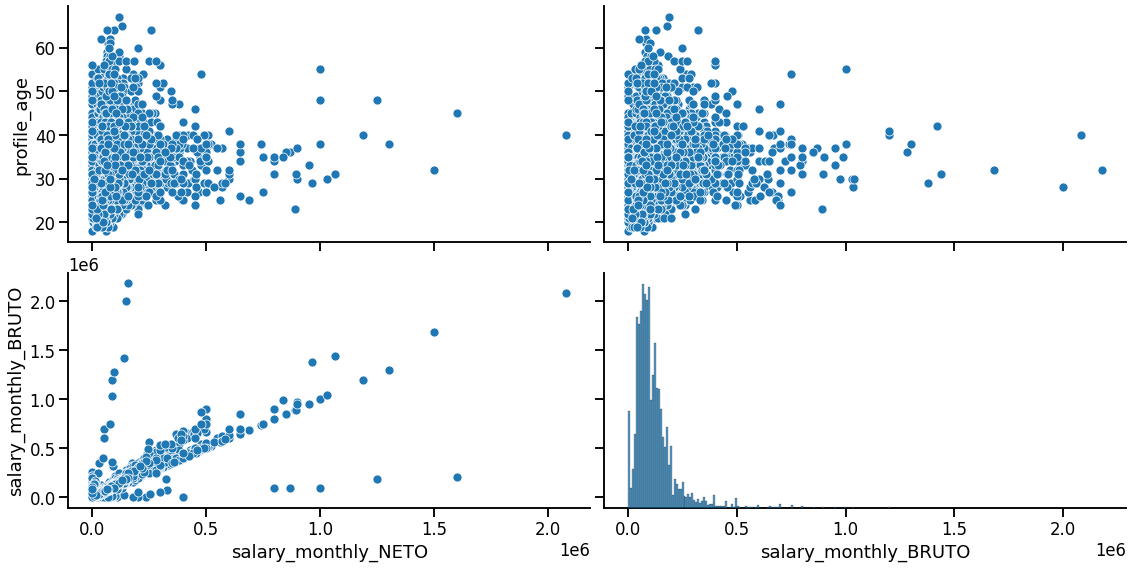

In [ ]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 aspect=2, height=4)

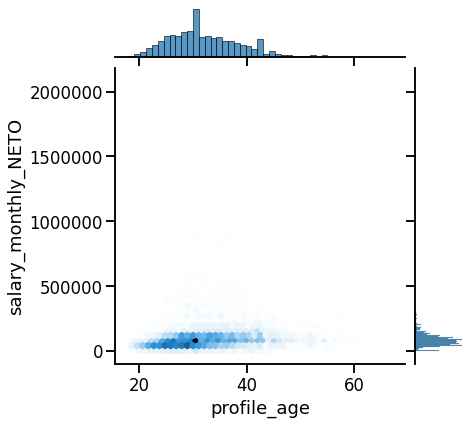

In [ ]:
seaborn.jointplot(data=df[df.profile_age < max_age], x='profile_age',
                  y='salary_monthly_NETO', kind='hex', height=6)
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

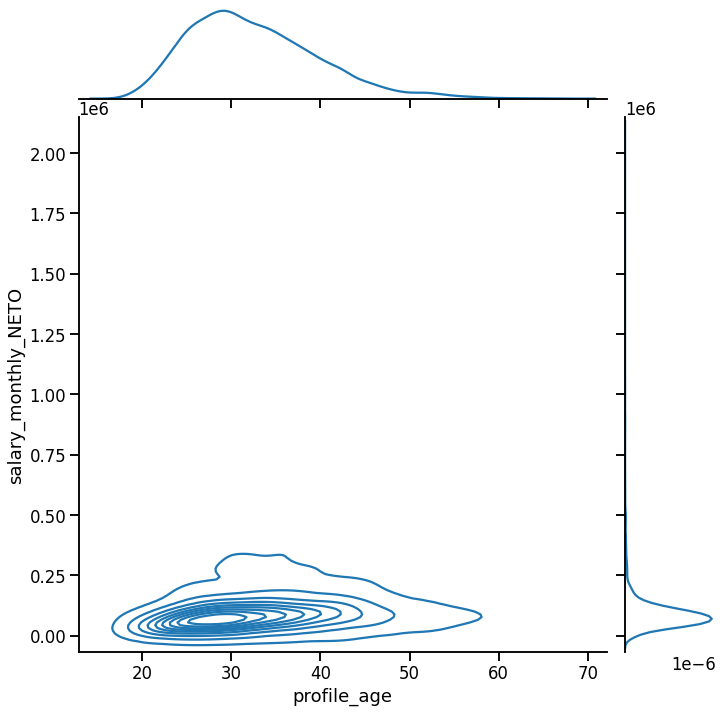

In [ ]:
seaborn.jointplot(data=df[df.profile_age < max_age], x='profile_age',
                  y='salary_monthly_NETO', kind='kde', height=10)

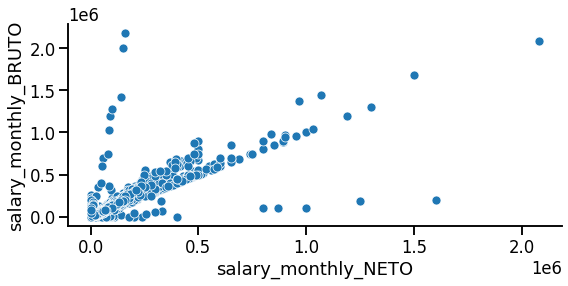

In [ ]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

**Pregunta** ¿Cuáles le parece que son las ventajas de ver de a dos  (o más) variables simultáneamente?

## Mixtas

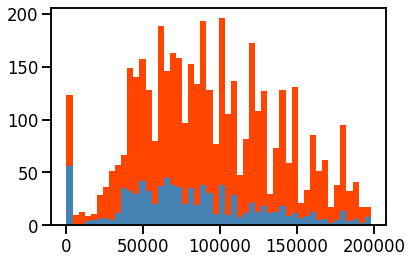

In [ ]:
filtered_df= df[df[salary_col] < 200000]
df_H= filtered_df[ filtered_df['profile_gender']=='Hombre']
df_M=filtered_df[ filtered_df['profile_gender']=='Mujer']

plt.hist(df_H[salary_col], color='orangered', bins=50)
plt.hist(df_M[salary_col], color='steelblue', bins=50)
plt.show()


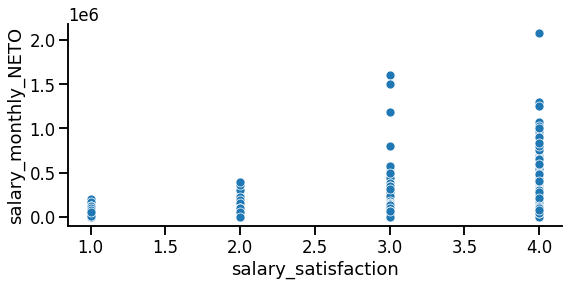

In [ ]:
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_satisfaction'],
                 aspect=2, height=4)

Una desventaja de usar un pairplot para variables categóricas es la superposición de los puntos que tienen el mismo valor. Un gráfico que soluciona este problema es el `catplot`

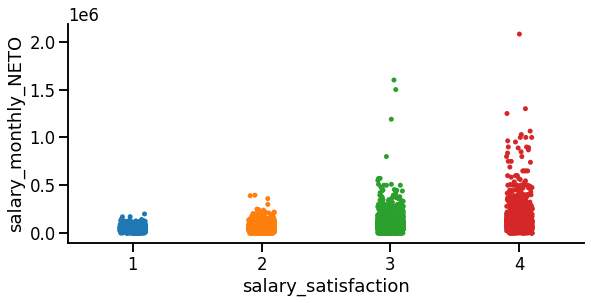

In [ ]:
seaborn.catplot(data=df[df.profile_age < max_age], y='salary_monthly_NETO',
                x='salary_satisfaction', height=4, aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


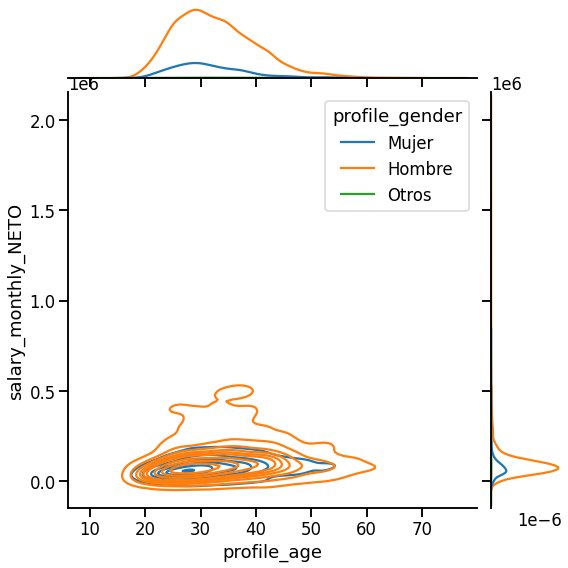

In [ ]:
seaborn.jointplot(data=df[df.profile_age < max_age], x='profile_age',
                  y='salary_monthly_NETO', hue='profile_gender',
                  kind='kde', height=8)

# Práctico para resolver en clase

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?

2. Genere una nueva variable `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales. 
  1. ¿Qué concepto matemático utiliza para entender la nueva variable?
  2. Calcule de dos fomas diferentes la media muestral de dicha variable. 
  2. Analice la distribución de los datos, su rango de valores e interprete. ¿Qué puede estar pasando? ¿Qué propone como solución?

3. Considerando toda la base:
  1. ¿Que pregunta le interesaría responder?
  2. ¿Que par de variables le conviene analizar en conjunto? Visualice su distribución conjunta. 
  3. ¿Qué medidas podrían resumir la información de la distribución de esas variables? visualícelas e interprete cada una.

4. Resuma:
  1. Si está queriendo analizar el comportamiento conjunto de dos variables, ¿qué gráficos y medidas conviene utilizar? 
  2. ¿Y si ambas variables son numéricas? 
  3. ¿Y si ambas son categóricas? 
  4. ¿Y si una es categórica y la otra numérica? 